# 题记

不知道从哪里看到这样一个游戏，假设有100人，每人初始的财富值为100，然后游戏开始，游戏规则如下：每个人轮流从剩余的99个人中随机选择一个人，然后将自己财富中的1元给抽中的幸运者。若干轮后，有些人比较幸运，财富值会超过100；但是还有些人比较倒霉，财富值会低于100，甚至可能为为0，一旦财富值为0，那么就不再抽签，也就不用付出1元，但是仍然可以作为被别人抽签的对象。那么，经过若干轮后，财富的分布情况会是怎样的呢？

直观上看，在游戏中每个人都是公平的，每个人付出的成本是一样的（每轮游戏都是1元），得到的收益也是公平的，每个人被抽中的概率完全相同，似乎财富的分布应该是均匀的，但是经过模拟后，发现财富的分布并不是均匀的，而是呈现一种“马太效应”，即财富越多的越富有，财富越少的越贫穷，这就是“土地兼并”现象。这一问题非常值得思考，我们可以将这个游戏视为一种经济制度，这个制度几乎是完美的，每个人都是公平的，没有任何能力上的差异，没有任何人拥有特权，但是经过若干轮后，财富的分布仍然呈现出“马太效应”，随着时间的推移，财富的分布越来越不均匀，这就是土地兼并现象。

土地兼并是王朝周期律的一个重要解释，为什么会出现土地兼并？一个新的王朝建立后，王朝的创始人高度重视土地问题，将土地公平地分配给每个人，但是随着时间的推移，总会有各种各样的意外，导致土地的分布开始集中。假设一个村子有100户人家，每家都有100亩地，那么这个村子的土地分布是均匀的，但是随着时间的推移，总会有一些意外，使得土地逐渐开始集中。张三上山采药摔不幸摔断了一条腿，在床上一躺就是3年，这三年不仅不能干活而且还得喝药，钱从哪来？走投无路之际只好选择将自家10亩地卖给李四。李四购买了这10亩地后，每年出现一些剩余，于是决定把自家比较聪明的小儿子送入私塾，小儿子还算争气，经过多年努力考上秀才，从此李四家成为当地的士绅，不用交税纳粮。类似地，随着时间的推移，出现变故的家庭逐渐增多，这些家庭只能选择将家里唯一值钱的财产——土地卖给李四这种家里较为富裕的家庭，于是土地开始集中，这就是土地兼并现象。在我举的这个例子中，没有任何外部干涉，仅仅是自然变故，就导致了土地的集中。是想，如果李四家的小儿子心术不正，利用自己的身份地位，贿赂当地的县太爷，通过巧取豪夺的方式，将村里更多的土地集中到自己手里，那么土地兼并现象会更加迅速、严重。

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
## 使用中文
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
# 参数设置
n_people = 100
initial_money = 100
rounds_list = [1000, 10_000, 100_000, 1_000_000]

# 运行模拟（复用之前的函数）
def run_simulation(rounds):
    people = [initial_money] * n_people
    for _ in range(rounds):
        for i in range(n_people):
            if people[i] > 0:
                j = random.choice([x for x in range(n_people) if x != i])
                people[i] -= 1
                people[j] += 1
    return people

# 运行所有模拟并存储结果
results = {}
for rounds in rounds_list:
    print(f"正在模拟 {rounds} 轮...")
    results[rounds] = run_simulation(rounds)

正在模拟 1000 轮...
正在模拟 10000 轮...
正在模拟 100000 轮...
正在模拟 1000000 轮...


In [23]:
def gini_coefficient(incomes):
    """
    计算给定收入列表的基尼系数
    参数：
        incomes (list): 包含每个个体收入的列表
    返回：
        float: 基尼系数（0到1之间）
    """
    # 过滤无效数据并排序
    incomes = sorted(filter(lambda x: x >= 0, incomes))
    n = len(incomes)
    if n == 0 or sum(incomes) == 0:
        return 0.0  # 处理全零收入的特殊情况
    
    # 计算累积值
    cumulative_income = 0
    cumulative_area = 0
    total_income = sum(incomes)
    
    for i, income in enumerate(incomes):
        cumulative_income += income
        # 计算每个矩形的面积（梯形法）
        if i == 0:
            width = 1/n
            height = income/total_income
            cumulative_area += 0.5 * width * height
        else:
            width = 1/n
            prev_height = sum(incomes[:i])/total_income
            current_height = cumulative_income/total_income
            cumulative_area += width * (prev_height + current_height)/2
    
    # 计算基尼系数
    gini = (0.5 - cumulative_area) / 0.5
    return round(gini, 4)

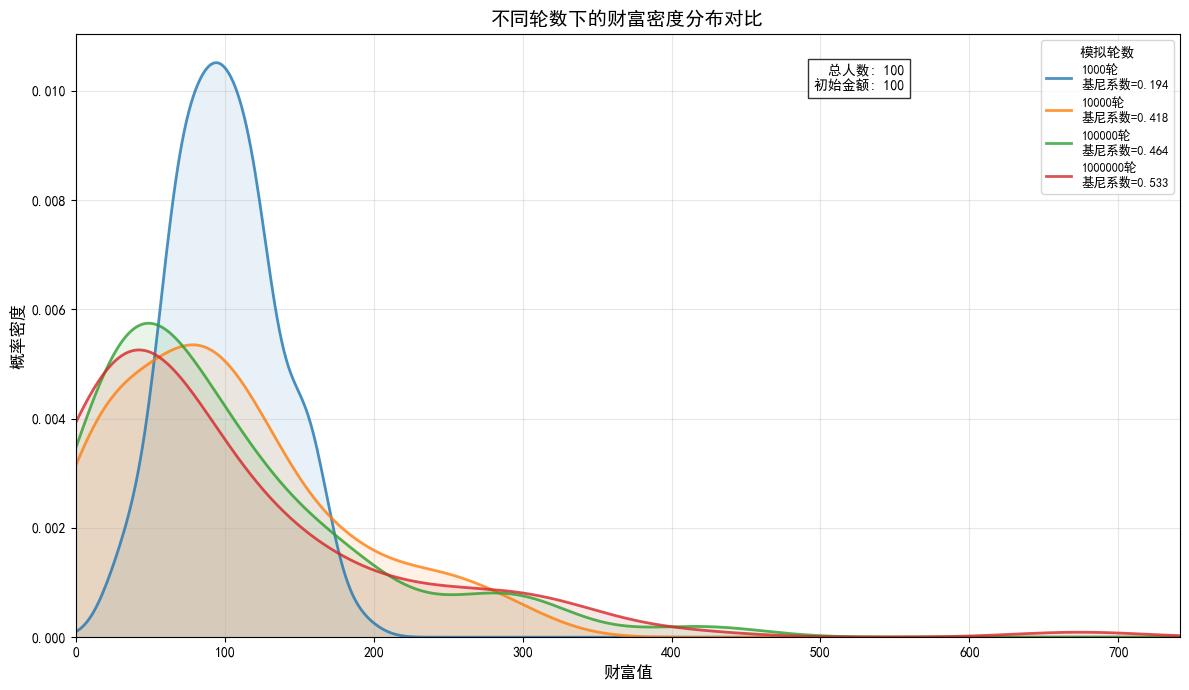

In [29]:
from scipy.stats import gaussian_kde
# 可视化设置
plt.figure(figsize=(12, 7))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
labels = [f'{rounds}轮' for rounds in rounds_list]

# 动态确定全局x轴范围
all_wealth = np.concatenate(list(results.values()))
x_min, x_max = 0, max(all_wealth) * 1.1
x_grid = np.linspace(x_min, x_max, 500)

# 绘制密度图
for idx, (rounds, wealth) in enumerate(results.items()):
    # 计算核密度估计
    kde = gaussian_kde(wealth)
    y = kde(x_grid)
    
    # 绘制密度曲线
    plt.plot(x_grid, y, 
             color=colors[idx],
             linewidth=2,
             alpha=0.8,
             label=f'{rounds}轮\n基尼系数={gini_coefficient(wealth):.3f}')
    
    # 填充曲线下方区域
    plt.fill_between(x_grid, y, 
                     color=colors[idx], 
                     alpha=0.1)

# 添加统计标注
plt.text(0.75, 0.95,
         f"总人数: {n_people}\n初始金额: {initial_money}",
         transform=plt.gca().transAxes,
         ha='right', va='top',
         bbox=dict(facecolor='white', alpha=0.8))

# 美化图形
plt.title('不同轮数下的财富密度分布对比', fontsize=14)
plt.xlabel('财富值', fontsize=12)
plt.ylabel('概率密度', fontsize=12)
plt.legend(title='模拟轮数', loc='upper right', fontsize=9)
plt.grid(True, alpha=0.3)
plt.xlim(x_min, x_max)
plt.ylim(0, None)  # 自动确定y轴上限
plt.tight_layout()

plt.savefig('combined_wealth_density.png', dpi=300)
plt.show()

随着游戏轮数的增加，财富的分布越来越不均匀，基尼系数逐渐增加，看似公平的游戏，结果却引人深思。